#   <center>Major Project <br>By shivam sharma</center>



### IMPORTING NECCESARRY LIBRARIES

In [79]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score,classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [80]:
print(pd.__version__,np.__version__,sns.__version__) #VERSION CHECK

1.1.3 1.19.2 0.11.0


In [81]:
data = pd.read_csv("pokemon.csv") #LOAD OUR DATASET

In [82]:
data.head() #PEEK INTO DATASET

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,target
0,37,106,111,37,106,111,37,106,111,37,...,37,106,111,37,106,111,37,106,111,Charmander
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Charmander
2,103,244,68,91,234,60,86,226,53,91,...,78,219,57,78,218,53,123,255,74,Pikachu
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Pikachu
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bulbasaur


In [83]:
data.shape #SHAPE OF WHOLE DATASET

(304, 30001)

### We need to classify the type of Pokemon

In [84]:
Y = data[['target']] #WE PUT PUT TARGET VALUE INTO Y VARIABLE WHICH WILL LATER BE USED FOR VALIDATING THE PREDICTIONS.
Y.head()

,target
0,Charmander
1,Charmander
2,Pikachu
3,Pikachu
4,Bulbasaur


In [85]:
X = data.drop(columns=['target'],inplace=False) #AND DROP THE COLUMN FROM THE INPUT DATA
X

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,37,106,111,37,106,111,37,106,111,37,...,111,37,106,111,37,106,111,37,106,111
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,103,244,68,91,234,60,86,226,53,91,...,51,78,219,57,78,218,53,123,255,74
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,9,65,17,9,65,17,9,65,17,9,...,121,121,121,121,102,124,118,73,184,155
300,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
301,0,6,6,1,7,7,1,7,9,1,...,132,118,124,124,142,144,145,118,119,120
302,255,250,247,255,250,247,255,250,247,255,...,227,252,233,226,253,220,217,255,186,191


In [86]:
X.shape #NOW THE SHAPE OF INPUT X IS 

(304, 30000)

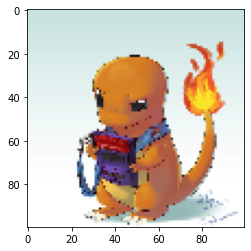

In [93]:
X_array = X.to_numpy() # LETS TRY TO SEE SOME OF OUR DATA INPUTS.
plt.imshow(X_array[75].reshape(100,100,3))

In [95]:
Y[75]

array(['Charmander'], dtype=object)

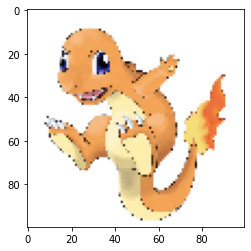

In [96]:
plt.imshow(X_array[30].reshape(100,100,3))

In [97]:
Y[30]

array(['Charmander'], dtype=object)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


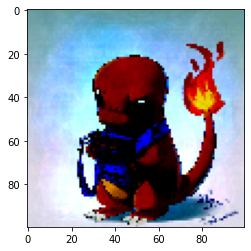

In [41]:
plt.imshow(X[75].reshape(100,100,3))

In [99]:
## Make use of preprocessing and also cheeck side wise.  jaccard_similarity_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4) # Test size gives the percentage of data which will be kept for testing.
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape) # Out of sample data.

Train set: (243, 30000) (243, 1)
Test set: (61, 30000) (61, 1)


In [118]:
lst_clf_jacc = []
lst_clf_name = [] # To store the best accuracy and the name of the classifier respectively

# Logistic Regression

In [102]:
solver_dict = {0:"newton-cg", 1:"lbfgs", 2:"sag", 3:"saga",4:"liblinear"}
for i in range(0,5):
    CLF = LogisticRegression(C=0.01,solver=solver_dict[i])
    Model_Lgr = CLF.fit(X_train,y_train) # This fits the value and creates a model ready to predict.
    Y_hat = Model_Lgr.predict(X_test)
    print("--------------------------------------------------------------------------------------------")
    print("Jaccard Accuracy for ",solver_dict[i],"is",jaccard_score(y_test, Y_hat,average='weighted'))
    #print (classification_report(y_test,model_lgr.predict(X_test)))
    print("ACCURACY CARD \n")
    print("In sample/Train set Accuracy",':',solver_dict[i], accuracy_score(y_train, model_lgr.predict(X_train)))
    print("Out of sample accuracy",':',solver_dict[i],accuracy_score(y_test,model_lgr.predict(X_test)))
    print("--------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------
Jaccard Accuracy for  newton-cg is 0.7357888013625719
ACCURACY CARD 

In sample/Train set Accuracy : newton-cg 0.6008230452674898
Out of sample accuracy : newton-cg 0.47540983606557374
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Jaccard Accuracy for  lbfgs is 0.7357888013625719
ACCURACY CARD 

In sample/Train set Accuracy : lbfgs 0.6008230452674898
Out of sample accuracy : lbfgs 0.47540983606557374
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Jaccard Accuracy for  sag is 0.7565856416054269
ACCURACY CARD 

In sample/Train set Accuracy : sag 0.6008230452674898
Out of sample accuracy : sag 0.47540983606557374
----------

# Our data is not processed, lets standardize and normalize our values of x and see the change.

In [104]:
X = data.drop(columns=['target'],inplace=False) #AND DROP THE COLUMN FROM THE INPUT DATA
X = preprocessing.StandardScaler().fit(X).transform(X) ##Use
##
X

array([[-1.0000518 , -0.44331719, -0.33467025, ..., -1.04059332,
        -0.47089872, -0.31784393],
       [ 0.87983567,  0.86443243,  0.90448434, ...,  0.86638897,
         0.85665642,  0.92082214],
       [-0.43091156,  0.76788715, -0.70469558, ..., -0.28829755,
         0.85665642, -0.6361123 ],
       ...,
       [-1.31911527, -1.3210015 , -1.23822047, ..., -0.33203568,
        -0.35507176, -0.2404273 ],
       [ 0.87983567,  0.82054821,  0.83564242, ...,  0.86638897,
         0.24188256,  0.37030389],
       [ 0.87983567,  0.86443243,  0.90448434, ...,  0.84014609,
         0.82992713,  0.8950166 ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


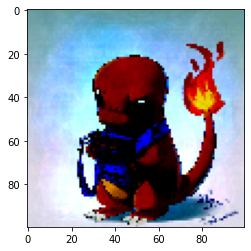

In [105]:
plt.imshow(X[75].reshape(100,100,3))

# Lets try to rerun the model:

In [107]:
solver_dict = {0:"newton-cg", 1:"lbfgs", 2:"sag", 3:"saga",4:"liblinear"}
for i in range(0,5):
    CLF = LogisticRegression(C=0.01,solver=solver_dict[i])
    Model_Lgr = CLF.fit(X_train,y_train) # This fits the value and creates a model ready to predict.
    Y_hat = Model_Lgr.predict(X_test)
    print("--------------------------------------------------------------------------------------------")
    print("Jaccard Accuracy for ",solver_dict[i],"is",jaccard_score(y_test, Y_hat,average='weighted'))
    #print (classification_report(y_test,model_lgr.predict(X_test)))
    print("ACCURACY CARD \n")
    print("In sample/Train set Accuracy",':',solver_dict[i], accuracy_score(y_train, model_lgr.predict(X_train)))
    print("Out of sample accuracy",':',solver_dict[i],accuracy_score(y_test,model_lgr.predict(X_test)))
    print("--------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------
Jaccard Accuracy for  newton-cg is 0.7357888013625719
ACCURACY CARD 

In sample/Train set Accuracy : newton-cg 0.6008230452674898
Out of sample accuracy : newton-cg 0.47540983606557374
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Jaccard Accuracy for  lbfgs is 0.7357888013625719
ACCURACY CARD 

In sample/Train set Accuracy : lbfgs 0.6008230452674898
Out of sample accuracy : lbfgs 0.47540983606557374
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Jaccard Accuracy for  sag is 0.7565856416054269
ACCURACY CARD 

In sample/Train set Accuracy : sag 0.6008230452674898
Out of sample accuracy : sag 0.47540983606557374
----------

# Our data is poorly set, that is why even processing didn't help.

In [119]:
lst_clf_jacc.append(0.757)
lst_clf_name.append('Logistic Regression')
#Putting in values

## Liblinear gave the best accuracy according to both Jaccard and accuracy score. 

We take Jacard index as a measure for internal evaluation for the best solver among all and Accuracy score for Evaluation in out of sample / test data. 

## K nearest neighbors


In [109]:
# Lets start with k = 4 
# Running the model on preprocessed data.
k = 4
clf = kn(n_neighbors = k )
model_knn = clf.fit(X_train,y_train)

In [110]:
Y_hat = model_knn.predict(X_test)
Y_hat[0:5]
print("In sample/Train set Accuracy: ", accuracy_score(y_train, model_knn.predict(X_train)))
print("Out of sample/Test set Accuracy: ",accuracy_score(y_test, Y_hat))

In sample/Train set Accuracy:  0.8724279835390947
Out of sample/Test set Accuracy:  0.7540983606557377


Well we have predicted the class labels on the test set and got the accuracy to be : 0.81 (on test). But what about other values of k There may be a value of k for which we can get better accuracy.

Enter the max value of k = 10
Jaccard Accuracy for k =  1 is 0.7477785697315278
Jaccard Accuracy for k =  2 is 0.5894633599551632
Jaccard Accuracy for k =  3 is 0.5670728258041159
Jaccard Accuracy for k =  4 is 0.6208743169398907
Jaccard Accuracy for k =  5 is 0.6291158750175143
Jaccard Accuracy for k =  6 is 0.6511096675031101
Jaccard Accuracy for k =  7 is 0.5880388585306617
Jaccard Accuracy for k =  8 is 0.5737131434282858
Jaccard Accuracy for k =  9 is 0.6335486007617155
Jaccard Accuracy for k =  10 is 0.5744715996270546


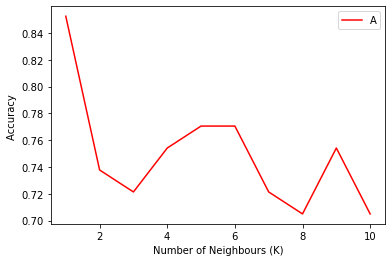

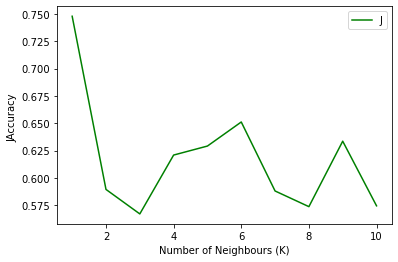

The best accuracy was with 0.8524590163934426 with k= 1
The best jaccard accuracy was with 0.7477785697315278 with k= 1


In [111]:
def k_model_acc(K):
    mean_acc = np.zeros((K)) # Creates an null array of shape : (10,)  
    mean_jacc = np.zeros((K))
    
    for n in range(1,K+1):
        #Train Model and Predict  
        Model = kn(n_neighbors = n).fit(X_train,y_train)
        y_hat=Model.predict(X_test)
        mean_acc[n-1] = accuracy_score(y_test, y_hat)
        mean_jacc[n-1] = jaccard_score(y_test, y_hat,average='weighted')
        print("Jaccard Accuracy for k = ",n,"is",jaccard_score(y_test, y_hat,average='weighted'))
    return mean_acc,mean_jacc

def acc_show(K,mean_acc):
    plt.plot(range(1,K+1),mean_acc,'r')
    plt.legend(('Accuracy '))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbours (K)')
    plt.show()

def jacc_show(K,mean_jacc):
    plt.plot(range(1,K+1),mean_jacc,'g')
    plt.legend(('JAccuracy '))
    plt.ylabel('JAccuracy ')
    plt.xlabel('Number of Neighbours (K)')
    plt.show()
    
    

    
k = int(input("Enter the max value of k = "))
p = k_model_acc(k) 
acc_show(k,p[0])
jacc_show(k,p[1])
print( "The best accuracy was with", p[0].max(), "with k=", p[0].argmax()+1)
print( "The best jaccard accuracy was with", p[1].max(), "with k=", p[1].argmax()+1)

In [112]:
Y_hat = model_knn.predict(X_test)
Y_hat[0:5]

array(['Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu'],
      dtype=object)

In [113]:
print("In sample/Train set Accuracy: ", accuracy_score(y_train, model_knn.predict(X_train)))
print("Out of sample/Test set Accuracy: ",accuracy_score(y_test, Y_hat))

In sample/Train set Accuracy:  0.8724279835390947
Out of sample/Test set Accuracy:  0.7540983606557377


As we see there isn't any big change in our accuracy by changing the value of k, thus finalising the k as 9 we will finally evaluate our results.

In [120]:
lst_clf_jacc.append(0.754)
lst_clf_name.append('K nearest neighnors k = 1')

In [121]:
table = pd.DataFrame(lst_clf_jacc, index=[lst_clf_name[0],lst_clf_name[1]])
table.columns = ['Jaccard Score']
table.columns.name = 'Classifier Type'
table

Classifier Type,Jaccard Score
Logistic Regression,0.757
K nearest neighnors k = 1,0.754


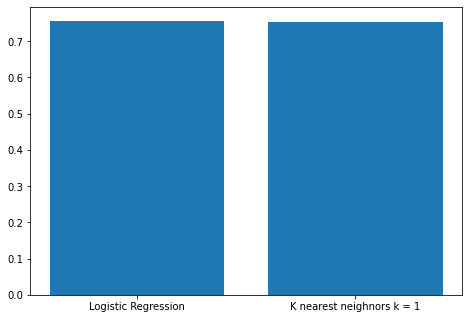

In [123]:
#Bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = lst_clf_name
students = lst_clf_jacc
ax.bar(langs,students)
plt.show()

## Both the algorithms are equivaentely good

# From the above table it is evident that for the given dataset the maximum out of sample accuracy is for KNN.

NOTE: This does not mean that other classifiers are not good, different classifiers work with different settings of parameters and hyper parameters, thus the classifiers accuracy depends upon the problem statment , the features, the type of attribute we want to get.

## Thank you